<a href="https://colab.research.google.com/github/revati2013/data_science/blob/main/case_study1(text_analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text analysis, also known as text mining or natural language processing (NLP), is the process of extracting meaningful insights, patterns, and information from unstructured text data. It involves various techniques such as text preprocessing, sentiment analysis, named entity recognition, topic modelling, and text classification.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
import spacy
from collections import defaultdict
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk import word_tokenize
from wordcloud import WordCloud
from textblob import TextBlob
nlp = spacy.load('en_core_web_sm')
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv('articles.csv', encoding = 'ISO-8859-1')
data

,Article,Title
0,Data analysis is the process of inspecting and...,Best Books to Learn Data Analysis
1,The performance of a machine learning algorith...,Assumptions of Machine Learning Algorithms
2,You must have seen the news divided into categ...,News Classification with Machine Learning
3,When there are only two classes in a classific...,Multiclass Classification Algorithms in Machin...
4,The Multinomial Naive Bayes is one of the vari...,Multinomial Naive Bayes in Machine Learning
5,You must have seen the news divided into categ...,News Classification with Machine Learning
6,Natural language processing or NLP is a subfie...,Best Books to Learn NLP
7,By using a third-party application or API to m...,Send Instagram Messages using Python
8,Twitter is one of the most popular social medi...,Pfizer Vaccine Sentiment Analysis using Python
9,The squid game is currently one of the most tr...,Squid Game Sentiment Analysis using Python


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Article  34 non-null     object
 1   Title    34 non-null     object
dtypes: object(2)
memory usage: 672.0+ bytes


In [4]:
data.isnull().sum()

Article    0
Title      0
dtype: int64

1.Create word clouds to visualize the most frequent words in the titles.

In [53]:
data_string = ' '.join([cat for cat in data['Title']])


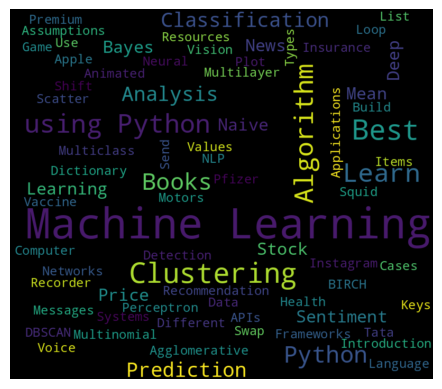

In [7]:
word_cloud = WordCloud(width=800,height=700,max_font_size=80).generate(data_string)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2.Analyze the sentiment expressed in the articles to understand the overall tone or sentiment of the content.

In [14]:
data['sentiment'] = data['Article'].apply(lambda x: TextBlob(x).sentiment.polarity)
fig = px.histogram(data,x='sentiment',title = 'Sentiment Distribution')
fig.show()

In [59]:
def extract_name_entities(text):
  doc = nlp(text)
  entities = defaultdict(list)
  for ent in doc.ents:
    entities[ent.label_].append(ent.text)
    return dict(entities)
data['Named_Entities']=data['Article'].apply(extract_name_entities)



In [55]:
from spacy import displacy
data_string2 = ' '.join([cat for cat in data['Article']])
docs=nlp(data_string2)
displacy.render(docs,style='ent',jupyter=True)

In [57]:
entity_counts = Counter(entity for entities in data['Named_entities'] for entity in entities)
entity_df = pd.DataFrame.from_dict(entity_counts,orient = 'index').reset_index()
entity_df.colmns['Entity','Count']
fig = px.bar(entity_df.head(10),x='Entity',y='Count',title='Top 10 entities Count')
fig.show()

TypeError: ignored

In [66]:
# Topic Modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
tf = vectorizer.fit_transform(data['Article'])
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_topic_matrix = lda_model.fit_transform(tf)

# Visualize topics
topic_names = ["Topic " + str(i) for i in range(lda_model.n_components)]
data['Dominant_Topic'] = [topic_names[i] for i in lda_topic_matrix.argmax(axis=1)]

fig = px.bar(data['Dominant_Topic'].value_counts().reset_index(), x='index', y='Dominant_Topic', title='Topic Distribution')
fig.show()
